In [2]:
import datetime
import time
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Carga de Datos

In [3]:
# Definir la variable coin
coin = 'binancecoin'

# Definir la ruta del archivo CSV según la variable coin
csv_path = f'../csv/{coin}.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

     Market Cap     Price     Volume        Date
0  1.072506e+07  0.107251   1.051223  2017-09-16
1  1.540413e+07  0.154041  14.678587  2017-09-17
2  1.734912e+07  0.173491   6.001767  2017-09-18
3  1.683342e+07  0.168334   3.878927  2017-09-19
4  1.666279e+07  0.166628  40.687619  2017-09-20


# Información básica del DataFrame

In [4]:
# Información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Market Cap  2166 non-null   float64
 1   Price       2166 non-null   float64
 2   Volume      2166 non-null   float64
 3   Date        2166 non-null   object 
dtypes: float64(3), object(1)
memory usage: 67.8+ KB
None


No se observan valores nulos u otros datos inconsistentes y los valores atipicos aportan informacion valiosa al EDA. Se puede uilizar el Data Frame sin necesidad de otros tratamientos iniciales.

# Estadísticas resumidas

In [48]:
print(df.describe())

         Market Cap         Price        Volume
count  3.767000e+03   3767.000000  3.767000e+03
mean   2.238984e+11  12035.920977  1.409890e+10
std    2.957626e+11  15596.374417  1.836772e+10
min    7.713681e+08     67.809000  0.000000e+00
25%    7.378935e+09    570.224150  1.341102e+08
50%    1.108966e+11   6383.753841  3.646749e+09
75%    3.361196e+11  18218.122572  2.416069e+10
max    1.278798e+12  67617.015545  1.788941e+11



El precio es volátil, su desviación estándar es más que la media, el precio ha cambiado en gran medida en cortos períodos de tiempo, el precio máximo fue muy alto.

La capitalización de mercado es volátil, su desviación estándar es mayor que la media.

El volumen también es volátil, la cantidad intercambiada ha cambiado significativamente con el tiempo.

Estas observaciones iniciales indican que podría considerarse como volátil en comparación con activos financieros tradicionales. 

# Histograma de Precios

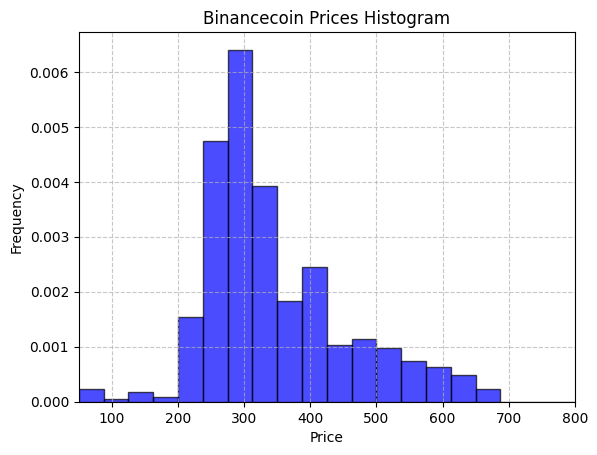

In [13]:
# Crear el histograma
plt.hist(df['Price'], bins=20, range=(50, 800), color='blue', edgecolor='black', density=True, alpha=0.7)

# Configurar límites del eje X
plt.xlim(50, 800)

# Configurar etiquetas y título
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'{coin.capitalize()} Prices Histogram')

# Mostrar la trama
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Una observación preliminar de los precios, sugiere aproximarse a una distribución de datos normal, en la que la mayoría de los valores tienden a agruparse fuertemente alrededor de los valores de precios mas frecuentes.

# Gráficos de dispersión (scatter plot)

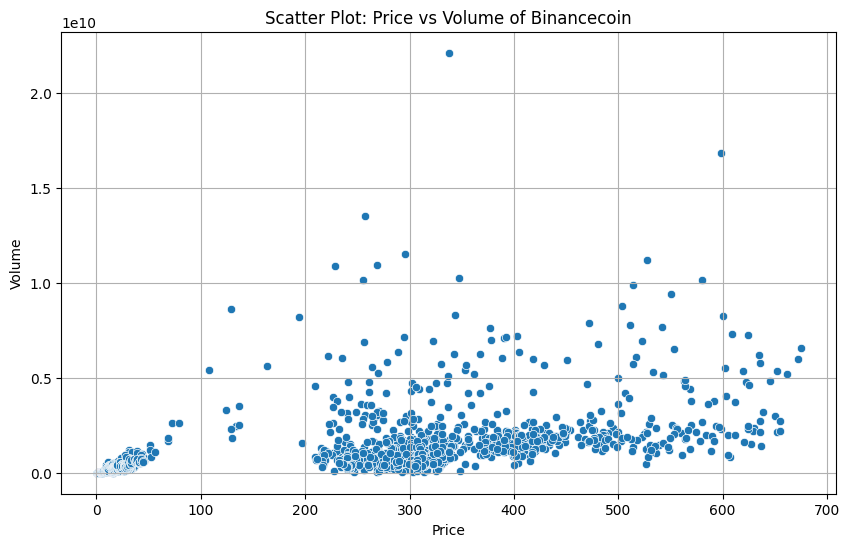

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Volume')
plt.title(f'Scatter Plot: Price vs Volume of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

No se observan muchos puntos que se desvíen significativamente de la tendencia general, estos puntos podrían representar eventos excepcionales que causaron un volumen inusual en relación con el precio.
El volumen tiende a aumentar cuando el precio sube, esto puede entenderse como una mayor actividad comercial cuando el precio es alcista.

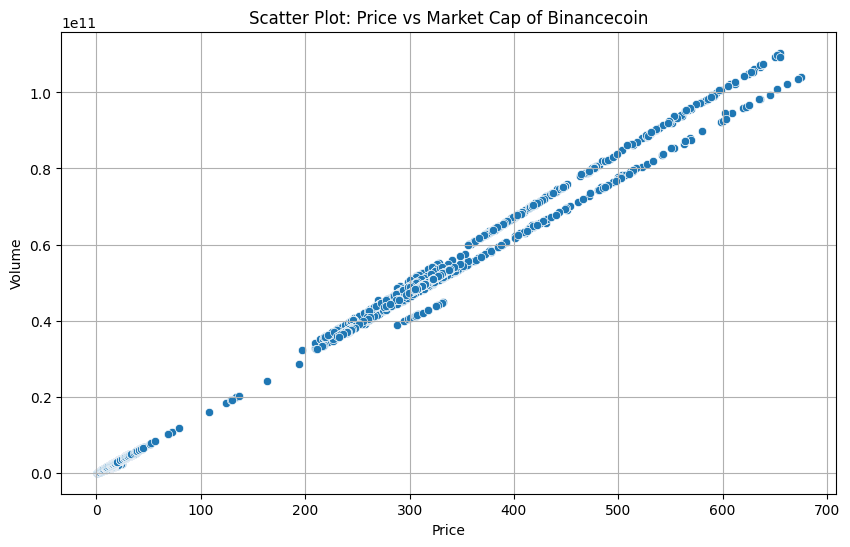

In [15]:
# Grafica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Market Cap')
plt.title(f'Scatter Plot: Price vs Market Cap of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [16]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[['Price', 'Market Cap']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
               Price  Market Cap
Price       1.000000    0.998426
Market Cap  0.998426    1.000000


La capitalización de mercado es el precio de Bitcoin multiplicado por la cantidad de Bitcoin que está en circulación. Por lo tanto, la capitalización de mercado también está determinada por la oferta y la demanda que determina el precio, de ahi esta alta correlación con el precio.

Líneas paralelas en el gráfico pueden deberse a inversores dominantes coordinando compras/ventas
o al efecto novedad del mercado, donde fundamentos del proyecto influyen más que condiciones del mercado.

Si bien, esta evaluacion puede parecer "verdad de Perogrullo", la capitalización de mercado va a ser un parámetro interesante a tener en cuenta en la confrontacion con otras criptomonedas.

# Gráficos de caja y bigotes (box plot)

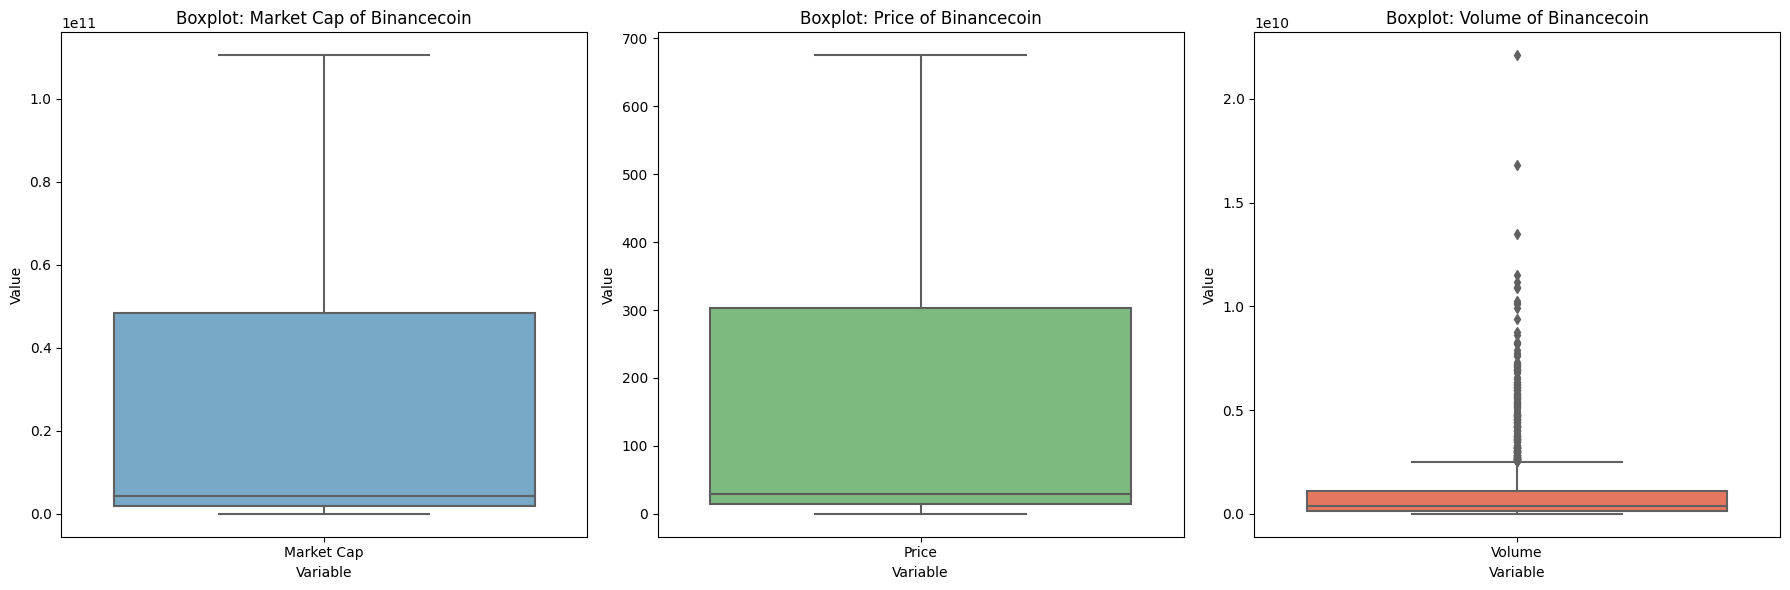

In [17]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Paletas predefinidas
palette = ['Blues', 'Greens', 'Reds']

# Boxplot de Market Cap
sns.boxplot(data=df[['Market Cap']], ax=axes[0], palette=palette[0])
axes[0].set_title(f'Boxplot: Market Cap of {coin.capitalize()}')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Value')

# Boxplot de Price
sns.boxplot(data=df[['Price']], ax=axes[1], palette=palette[1])
axes[1].set_title(f'Boxplot: Price of {coin.capitalize()}')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Value')

# Boxplot de Volume
sns.boxplot(data=df[['Volume']], ax=axes[2], palette=palette[2])
axes[2].set_title(f'Boxplot: Volume of {coin.capitalize()}')
axes[2].set_xlabel('Variable')
axes[2].set_ylabel('Value')

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

Las medianas cercanas al límite inferior del box con una dispersión considerable de los datos hacia arriba podría sugerir una volatilidad asimétrica, los precios experimentando fluctuaciones significativas pero con una tendencia general hacia la baja.
Valores atípicos causados por eventos excepcionales que afectaron temporalmente la criptomonedapodría podrias estar influyendo en la mediana al acercarla al límite inferior.

La mediana de precio y capitalización de mercado tienen alturas parecidas, ambos parámetros tendrían generalmente similar volatilidad, mientras tanto la altura comparativa de la mediana de volumen indicaría que es menos volátil. 
En general, el boxplot sugiere que Bitcoin es un activo muy volátil con una distribución muy concentrada.

In [18]:
# Convertir las columnas a numpy arrays numéricos
price_values = df['Price'].values
volume_values = df['Volume'].values
market_cap_values = df['Market Cap'].values

# Cálculos del Box-Whisker Ratio (BWR)
bwr_values = []

for values, column in zip([price_values, volume_values, market_cap_values], df.columns[1:]):
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    iwr = upper_whisker - lower_whisker
    if iwr != 0:  # Evitar división por cero
        bwr = iqr / iwr
        bwr_values.append(bwr)

# Imprimir los resultados del Box-Whisker Ratio (BWR)
for i, column in enumerate(df.columns[1:]):
    print(f"Box-Whisker Ratio (BWR) for {column}: {bwr_values[i]:.2f}")

# Cálculos de la Relative Median Height
median_height_values = []

for values in [price_values, volume_values, market_cap_values]:
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    median_height = np.median(values) / values.max()
    median_height_values.append(median_height)

# Imprimir los resultados de la Relative Median Height
for i, column in enumerate(df.columns[1:]):
    print(f"Relative Median Height (RMH))for {column}: {median_height_values[i]:.2f}")


Box-Whisker Ratio (BWR) for Price: 0.25
Box-Whisker Ratio (BWR) for Volume: 0.25
Box-Whisker Ratio (BWR) for Date: 0.25
Relative Median Height (RMH))for Price: 0.04
Relative Median Height (RMH))for Volume: 0.02
Relative Median Height (RMH))for Date: 0.04



Los valores obtenidos para BWR y RMH son consistentes con las observaciones realizadas a partir de los boxplots.  

# Gráficos de Evolución Temporal (line plot)

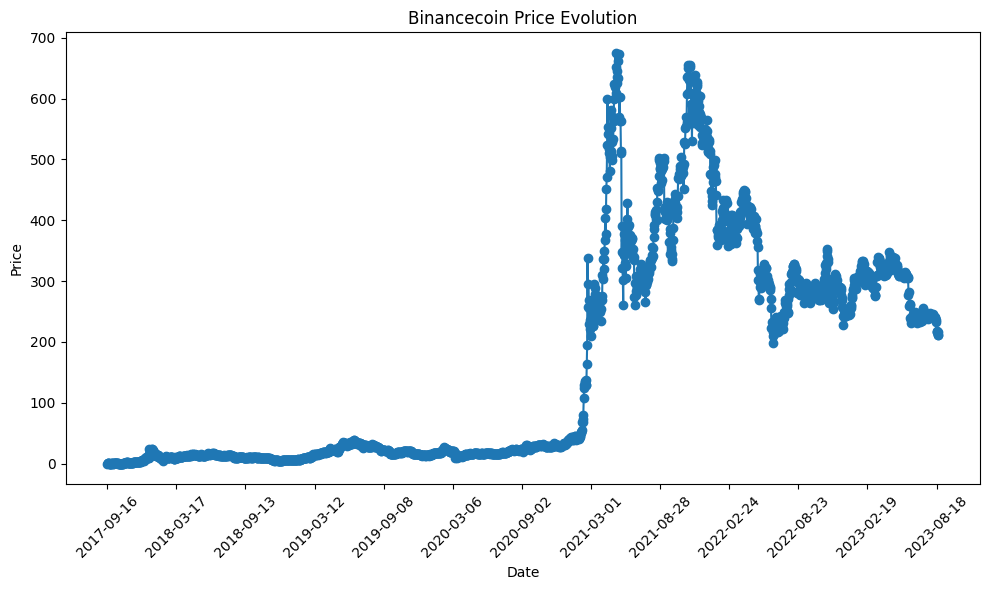

In [19]:
# Graficar la evolución del precio vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{coin.capitalize()} Price Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

plt.tight_layout()
plt.show()

La evolución del precio de Binance Coin (BNB) desde su inicio ha sido positiva, pero ha experimentado una gran volatilidad. El precio de BNB se disparó desde su lanzamiento en julio de 2017 hasta alcanzar un máximo histórico de 680 dólares en mayo de 2021. Sin embargo, el precio ha disminuido desde entonces, y actualmente se cotiza a alrededor de 216 dólares.

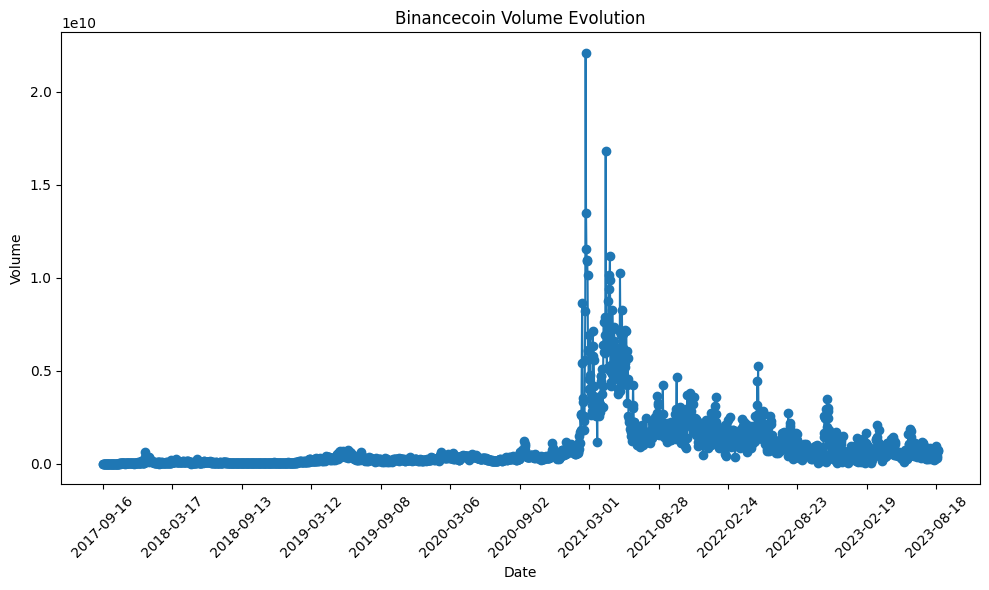

In [20]:
# Graficar la evolución del volumen vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{coin.capitalize()} Volume Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

# Guardar la gráfica en un archivo PNG
plt.savefig(f'png/{coin.capitalize()}_Volume_Evolution.png')

plt.tight_layout()
plt.show()


La evolución del volumen de Binance Coin (BNB) desde su inicio ha sido positiva. El volumen de BNB ha aumentado constantemente a lo largo de los años, y actualmente se sitúa en torno a los 500 millones de dólares.


In [ ]:
# Ejemplo de una serie de valores
data = df['Price']

# Calcula la media y la desviación estándar
mean = np.mean(data)
std = np.std(data)

# Calcula el coeficiente de curtosis
kurtosis = np.sum((np.array(data) - mean) ** 4) / (len(data) * std ** 4)

print("Coeficiente de Curtosis:", kurtosis)


Este coeficiente indica que hay una menor probabilidad de observar valores atípicos o extremos en la distribución de los precios en comparación con otras criptomonedas.

# Conclusiones Preliminares para BNB

Los distintos gráficos, cálculos y métricas evaluadas resultan consistentes, haciendo entendible el comportamiento histórico de esta criptomoneda.     

Binance, el principal exchange de criptomonedas a nivel global, ve su volumen de Binance Coin (BNB) influenciado por su crecimiento. La adopción en alza de la tecnología blockchain, en la que se basa el BNB, genera un mayor interés y aumenta su volumen.

Binancecoin ha mostrado una distribución platicúrtica(Coeficiente de Curtosis < 3) tiene colas más ligeras y un pico central más aplanado en comparación con una distribución normal.

Una distribución platicúrtica puede representar estabilidad relativa con menor probabilidad de eventos extremos,menor Riesgo de pérdidas extremas, adopción más amplia, más confiable para su uso en contratos inteligentes y acuerdos financieros, menor especulación y mayor atracción para Inversores Conservadores.

Esta criptomoneda podría formar parte de una estrategia de inversión más conservadora.

Los inversores más reacios al riesgo pueden preferir activos y mercados con distribuciones platicúrticas porque es menos probable que esos activos produzcan resultados extremos. 

# Binancecoin es un activo financiero con potencial de ganancias y pérdidas significativas. 

En caso de superar esta etapa de evaluacion preliminar, se recomienda un detallado análisis técnico, fundamental y de sentimiento para BNB.